Jocelyn Atziri Jiménez Buenrostro

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

In [4]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3257800236.py:5: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


**Cargar Datos**

In [5]:
from google.colab import files
uploaded = files.upload()

df_1 = pd.read_excel("Boston Housing Dataset 1978.xlsx")
df_1.head()

Saving Boston Housing Dataset 1978.xlsx to Boston Housing Dataset 1978.xlsx


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**EDA**

Escalar todas la variables para que todas esten en el dominio de [0,1]

In [6]:
df_scaled = df_1.copy()
X = df_scaled
for col in df_scaled.columns:

  minn = df_scaled[(col)].min()
  df_scaled[col] = (df_1[col]-minn)

  maxx = df_scaled[(col)].max()
  df_scaled[col]/=maxx

**Escalamiento MinMAX**

In [7]:
df_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,452.000000
mean,0.127346,0.132953,0.331837,0.140765,0.103374,0.125663,0.582702,0.220534,0.115885,0.461954,0.101484,0.838346,0.300116,0.399324
std,0.240726,0.230487,0.258458,0.312765,0.237730,0.282253,0.334848,0.283180,0.306078,0.261537,0.222128,0.316008,0.185585,0.201570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004961,0.000000,0.124009,0.000000,0.009238,0.024891,0.312179,0.056885,0.004511,0.338448,0.036520,0.919550,0.157512,0.279176
50%,0.014514,0.000000,0.250901,0.000000,0.022084,0.028635,0.648503,0.122265,0.006015,0.415171,0.041339,0.984265,0.264688,0.358124
75%,0.082237,0.181000,0.652487,0.000000,0.037818,0.035131,0.898597,0.227476,0.034586,0.554140,0.044636,0.996760,0.406518,0.464531
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Escalamiento Estandar**

In [8]:
import matplotlib.pyplot as plt

In [13]:
df_std = df_1.copy()
for col in df_std.columns.drop('MEDV'):
    media = df_std[col].mean()
    std = df_std[col].std()
    df_std[col] = (df_std[col] - media) / std

In [14]:
df_std.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM_std
count,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,452.000000,5.060000e+02
mean,1.123388e-16,6.319056e-17,2.527622e-16,0.000000,-2.808469e-17,-2.808469e-17,1.404235e-17,0.000000,-5.616939e-17,-7.021173e-17,0.000000,-3.931857e-16,-4.388233e-17,23.750442,8.425408e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,8.808602,1.000000e+00
min,-5.290063e-01,-5.768333e-01,-1.283910e+00,-0.450065,-4.348387e-01,-4.452134e-01,-1.740200e+00,-0.778778,-3.786107e-01,-1.766301e+00,-0.456869,-2.652925e+00,-1.617134e+00,6.300000,-4.452134e-01
25%,-5.083984e-01,-5.768333e-01,-8.041082e-01,-0.450065,-3.959800e-01,-3.570252e-01,-8.078969e-01,-0.577900,-3.638718e-01,-4.722298e-01,-0.292458,2.569683e-01,-7.684021e-01,18.500000,-3.570252e-01
50%,-4.687134e-01,-5.768333e-01,-3.131484e-01,-0.450065,-3.419420e-01,-3.437630e-01,1.965119e-01,-0.347021,-3.589588e-01,-1.788774e-01,-0.270765,4.617600e-01,-1.909018e-01,21.950000,-3.437630e-01
75%,-1.873840e-01,2.084605e-01,1.240628e+00,-0.450065,-2.757607e-01,-3.207470e-01,9.433994e-01,0.024515,-2.656120e-01,3.524779e-01,-0.255922,5.012980e-01,5.733277e-01,26.600000,-3.207470e-01
max,3.625091e+00,3.761807e+00,2.585188e+00,2.747221,3.771621e+00,3.097706e+00,1.246232e+00,2.752547,2.888526e+00,2.057243e+00,4.045031,5.115515e-01,3.771220e+00,50.000000,3.097706e+00


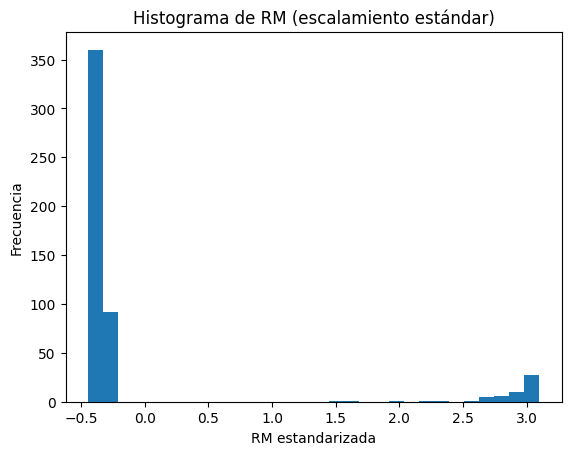

In [15]:
plt.hist(df_std['RM'], bins=30)
plt.xlabel('RM estandarizada')
plt.ylabel('Frecuencia')
plt.title('Histograma de RM (escalamiento estándar)')
plt.show()